In [2]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt

def scatter_plot_bigram(edges):
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = [30, 30]
    
    node_first = []
    node_second = []
    for edge in edges:
        node_first.append(int(edge[0]))
        node_second.append(int(edge[1]))
    largest_index = max(node_first)
    if largest_index < min(node_second):
        node_second = [ x -largest_index for x in node_second]
    
    fig, ax = plt.subplots()
    scale = 200.0 * np.random.rand(largest_index)
    ax.scatter(node_first, node_second, c='tab:orange')

    ax.grid(True)
    plt.axis('on')
    plt.xlabel("User")
    plt.ylabel("Item")
    plt.show()

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#plt.figure(figsize=(100,100), dpi=1)
plt.rcParams['figure.dpi'] = 40
plt.rcParams['figure.figsize'] = [200, 200]


emb_dict = dict()
with open("vectors_u_1000.dat", encoding='utf-8') as file:
    for line in file:
        key = line.split(' ')[0]
        val = [float(x) for x in line.split(' ')[1:]]
        emb_dict[key] = np.array(val)

with open("vectors_v_1000.dat", encoding='utf-8') as file:
    for line in file:
        key = line.split(' ')[0]
        val = [float(x) for x in line.split(' ')[1:]]
        emb_dict[key] = np.array(val)
X = [emb_dict[key] for key in emb_dict.keys()]

trueLabel=[]
with open("../HoloScope-master/testdata/yelp.edgelist.gz.trueA", encoding='utf-8') as file:
    for line in file:
        trueLabel.append('u' + line.strip())

with open("../HoloScope-master/testdata/yelp.edgelist.gz.trueB", encoding='utf-8') as file:
    for line in file:
        trueLabel.append('v' + line.strip())

In [4]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [50, 50]

In [5]:
def subgraph_process(G):
    #create a subgraph  for viewing pattern, filtering the small cluster
    nodes_isolate=[]
    for component in nx.connected_components(G):
        if(len(component)< 5):
            nodes_isolate += list(component)
    print("all nodes", len(nodes))
    print("ioslate nodes", len(nodes_isolate))
    nodes_remaining = set(nodes) - set(nodes_isolate)
    H = G.subgraph(nodes_remaining)
    return H

In [20]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
print(len(X))
db = DBSCAN(eps=0.8, min_samples=100, n_jobs=-1).fit(X)

labels = db.labels_
print(len(labels))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

12358
12358
Estimated number of clusters: 6
Estimated number of noise points: 4813


12358
7
250
250


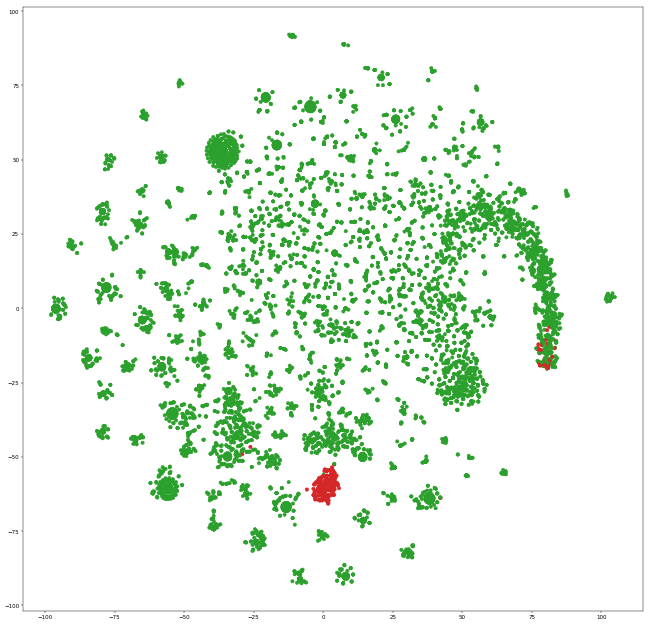

'\nimport collections\nccount = collections.Counter(true_predict)\ndeg, cnt = zip(*ccount.items())\nprint(deg[0:2])\nprint(cnt[0:2])\n'

In [21]:
print(len(db.labels_))
print(len(set(db.labels_)))
true_predict=[]
print(len(trueLabel))
color=[]
for label in trueLabel:
    for index, value in enumerate(emb_dict.keys()):
        if value == label:
            true_predict.append(db.labels_[index])
            
print(len(true_predict))

for index, value in enumerate(emb_dict.keys()):
    if value in set(trueLabel):
        color.append('tab:red')
    else:
        color.append('tab:green')
        
plt.rcParams['figure.dpi'] = 40
plt.rcParams['figure.figsize'] = [20, 20]

from sklearn.manifold import TSNE
Y = TSNE(n_components=2).fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c= color, cmap=plt.cm.Spectral)
plt.show()

'''
import collections
ccount = collections.Counter(true_predict)
deg, cnt = zip(*ccount.items())
print(deg[0:2])
print(cnt[0:2])
'''

In [ ]:
#cal degree
def degree_count(node_len, edges):
    degree = 0
    for edge in edges:
        if ','.join(edge) not in edgeDict:
            edge = (edge[1], edge[0])
        degree += {value.split(':')[0]:float(value.split(':')[1].strip()) for value in edgeDict[','.join(edge)]}["click_total"]
    return degree /node_len